# start with importing all the data and packages needed

In [1]:
#load all the relevant packages
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib as mlt

In [2]:
os.getcwd()

'C:\\Users\\cecilianatalie.strom\\GitHub\\INSA\\Opensanctions\\Clean'

In [3]:
us = pd.read_csv('ofac_sdn.csv',low_memory=False)
bis = pd.read_csv('us_bis.csv',low_memory=False)
cons = pd.read_csv('ofac_cons.csv',low_memory=False)

# import trigger data

In [4]:
#load trigger data
conflict = pd.read_csv('IV\\ucdp_cleaned.csv')
conflict_os = pd.read_csv('IV\\ucdp_os.csv')
coup= pd.read_csv('IV\\coup_data.csv')
terror= pd.read_csv('IV\\data_gti.csv')
protest= pd.read_csv('IV\\acled_clean.csv')

# us SDN list

**descriptives**

In [5]:
data = us.copy()
#get column names
print(data.columns)
print(data.describe())
print(data.schema.unique())
print(data.month.unique())
print(data.month.nunique())

print(data.date_stamp.unique())
print(data.date_stamp.nunique())
# receive information on missing values/ null values
is_null = data.isnull().sum()
print(is_null)


Index(['Unnamed: 0.1', 'Unnamed: 0', 'id', 'schema', 'name', 'aliases',
       'birth_date', 'countries', 'addresses', 'identifiers', 'sanctions',
       'phones', 'emails', 'dataset', 'last_seen', 'first_seen', 'date_stamp',
       'last_change', 'new_entry', 'deletion', 'unchanged', 'month',
       'listing_count', 'listing_date', 'delisting_date', 'new_listing_count',
       'year_id', 'month_id'],
      dtype='object')
       Unnamed: 0.1    Unnamed: 0    date_stamp  listing_count  listing_date  \
count  29653.000000  29653.000000  2.965300e+04   29653.000000  2.965300e+04   
mean   14826.000000  14826.000000  2.021601e+07   12999.395643  2.021601e+07   
std     8560.228102   8560.228102  7.613610e+03    3945.748155  7.613610e+03   
min        0.000000      0.000000  2.021082e+07    9053.000000  2.021082e+07   
25%     7413.000000   7413.000000  2.021082e+07    9124.000000  2.021082e+07   
50%    14826.000000  14826.000000  2.021093e+07   11559.000000  2.021093e+07   
75%    22239.

In [6]:
data = data.sort_values(by=['month'])

In [7]:
data = data.drop(['Unnamed: 0.1', 'Unnamed: 0'],axis= 'columns')
data

,id,schema,name,aliases,birth_date,countries,addresses,identifiers,sanctions,phones,...,new_entry,deletion,unchanged,month,listing_count,listing_date,delisting_date,new_listing_count,year_id,month_id
29652,ofac-sdn-9999,Person,Jose Aldemar RENDON RAMIREZ,MECHAS,1950-07-24,co,"Carrera 13 No. 18-50, Cartago, Valle, Colombia...",16202349,SDN List - Block - Program - Unknown - 2006-10-25,NaN,...,True,False,False,2021-08,9124,20210820,NaN,1,2021,29
23526,ofac-sdn-18594,Person,Tarad Mohammad Aljarba,Abu-Muhammad al-Shimali;Tarad Aljarba,1979-11-20,sa,Saudi Arabia,NaN,SDN List - Block - Program - Executive Order 1...,NaN,...,True,False,False,2021-08,9124,20210820,NaN,1,2021,29
23527,ofac-sdn-18595,Person,Omar Hussain,Abu Sa'eed al-Britani,1986-01-01;1987-12-31,gb,"High Wycombe, United Kingdom;United Kingdom",NaN,SDN List - Block - Program - Executive Order 1...,NaN,...,True,False,False,2021-08,9124,20210820,NaN,1,2021,29
23528,ofac-sdn-18596,Person,Muwaffaq Mustafa Muhammad al-Karmush,Abu Salah Al-'Afri;Muafaq Mustafa Mohammed al-...,1973-02-01,iq,Iraq,NaN,SDN List - Block - Program - Executive Order 1...,NaN,...,True,False,False,2021-08,9124,20210820,NaN,1,2021,29
23529,ofac-sdn-18598,Person,Yani Benjamin ROSENTHAL,NaN,1965-07-14,hn,"5 Calle, 24 Avenida S.O. #226, San Pedro Sula,...",0501196506001,SDN List - Block - Program - Foreign Narcotics...,NaN,...,True,False,False,2021-08,9124,20210820,NaN,1,2021,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20079,ofac-46000,Organization,LIMITED LIABILITY COMPANY FINANCE DECISIONS,Общество С Ограниченной Ответственностью Финан...,NaN,ru,"14 Spartakovskaya Square, Building 3, Suite 9N...",1217700369105;9729311995,SDN List - Executive Order 14024 (Russia),NaN,...,True,False,False,2023-12,14229,20231212,NaN,1,2023,7
6853,NK-S4fLUH2eDEC7TqBNippFZj,Organization,Streymoy Shipping Limited,NaN,NaN,ae;lr,"80 Broad Street, Monrovia;Unit 27610 - 001, Bu...",IMO 5724311,SDN List - Executive Order 14024 (Russia),NaN,...,True,False,False,2023-12,14229,20231204,NaN,1,2023,7
3318,NK-Dqq3SWLXrShkikiAKNaRpd,Person,Nasser Abu Sharif,'Abd-al-Nasr Sharif Al-Jamus;Abdal Nasser Shar...,1966-01-14,ir;ps,NaN,000083063,SDN List - Executive Order 13224 (Terrorism),NaN,...,True,False,False,2023-12,14229,20231215,NaN,1,2023,7
12387,NK-jzm6zThLgv836rUrta5XvD,Organization,"Laggar Pro, ooo",Obshchestvo S Ogranichennoi Otvetstvennostyu L...,NaN,ru,"ul. Ovarazhnaya, Str. 190B, Pomeshch. 19, 6076...",1185275034218;29336583;5250070144,SDN List - Executive Order 14024 (Russia),NaN,...,True,False,False,2023-12,14229,20231213,NaN,1,2023,7


In [8]:
print(data.listing_count.unique())

[ 9124 18450  9410  9386  9391  9053  9547 10027 10447 10494 10681 10574
 10564 10966 10992 11189 11609 11559 12137 12083 12317 12825 12622 12912
 12873 13282 13260 13918 14229]


In [9]:
#get the number of listings per month
listing_month = data.groupby('month').new_listing_count.sum()
listing_month

month
2021-08    9124
2021-09    9326
2021-10     309
2021-11     257
2021-12     286
2022-01      56
2022-02     515
2022-03     841
2022-04     642
2022-05     499
2022-06     596
2022-07     237
2022-08     166
2022-09     522
2022-10     440
2022-11     264
2022-12     522
2023-01     165
2023-02     668
2023-03     278
2023-04     391
2023-05     655
2023-06      84
2023-07     322
2023-08     113
2023-09     461
2023-10     203
2023-11     868
2023-12     843
Name: new_listing_count, dtype: int64

In [10]:
data['listing_month'] = data['new_listing_count'].groupby(data['month']).transform('sum')

In [11]:
print(data.listing_month.unique())

[9124 9326  309  257  286   56  515  841  642  499  596  237  166  522
  440  264  165  668  278  391  655   84  322  113  461  203  868  843]


<Axes: xlabel='month', ylabel='listing_count'>

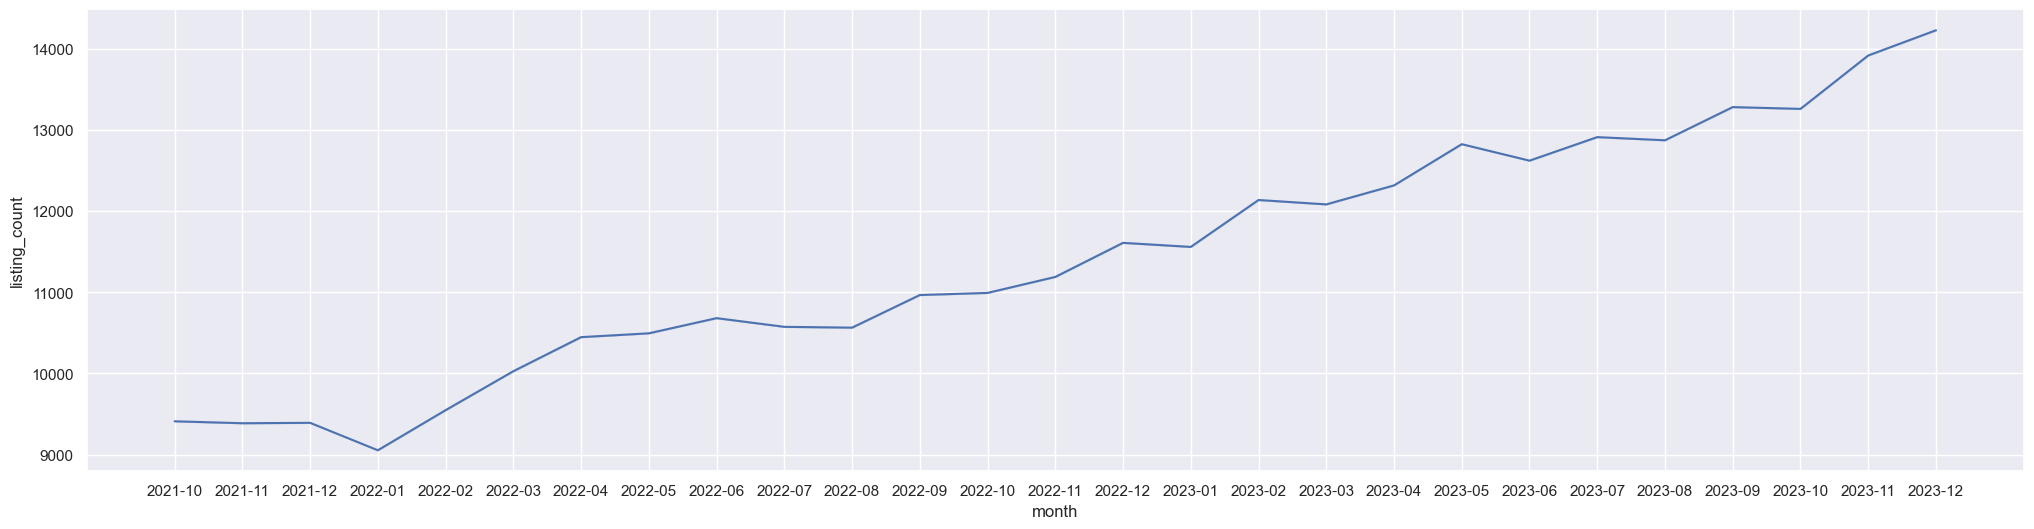

In [18]:
#get the total listings per month
data = data[data['month'] > '2021-09']
sns.set(rc={"figure.figsize":(25, 6)}) #width=3, #height=4
listings_us_sdn = sns.lineplot(data=data,x='month',y='listing_count')
listings_us_sdn

<Axes: xlabel='month', ylabel='listing_month'>

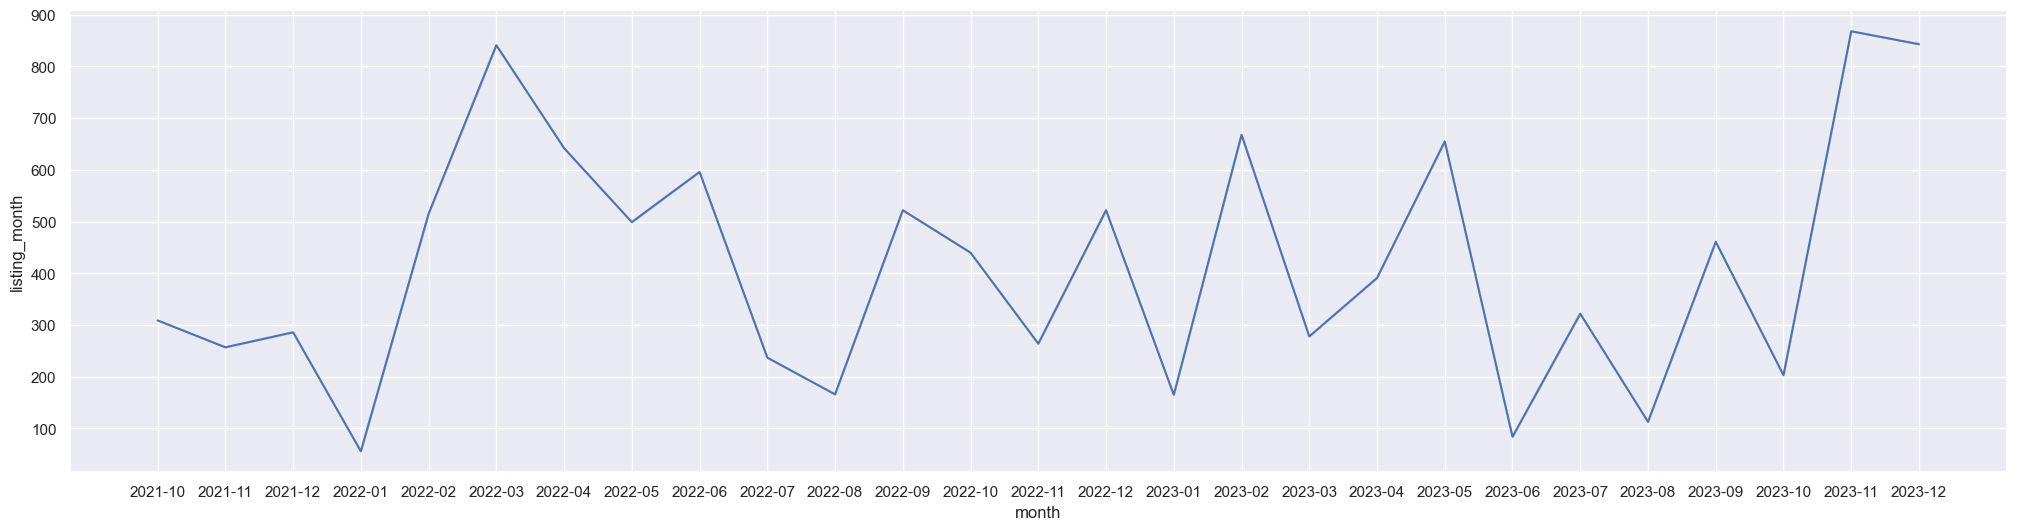

In [17]:
#get the total listings per month
sns.set(rc={"figure.figsize":(25, 6)}) #width=3, #height=4
listings_us_sdn = sns.lineplot(data=data,x='month',y='listing_month')
listings_us_sdn

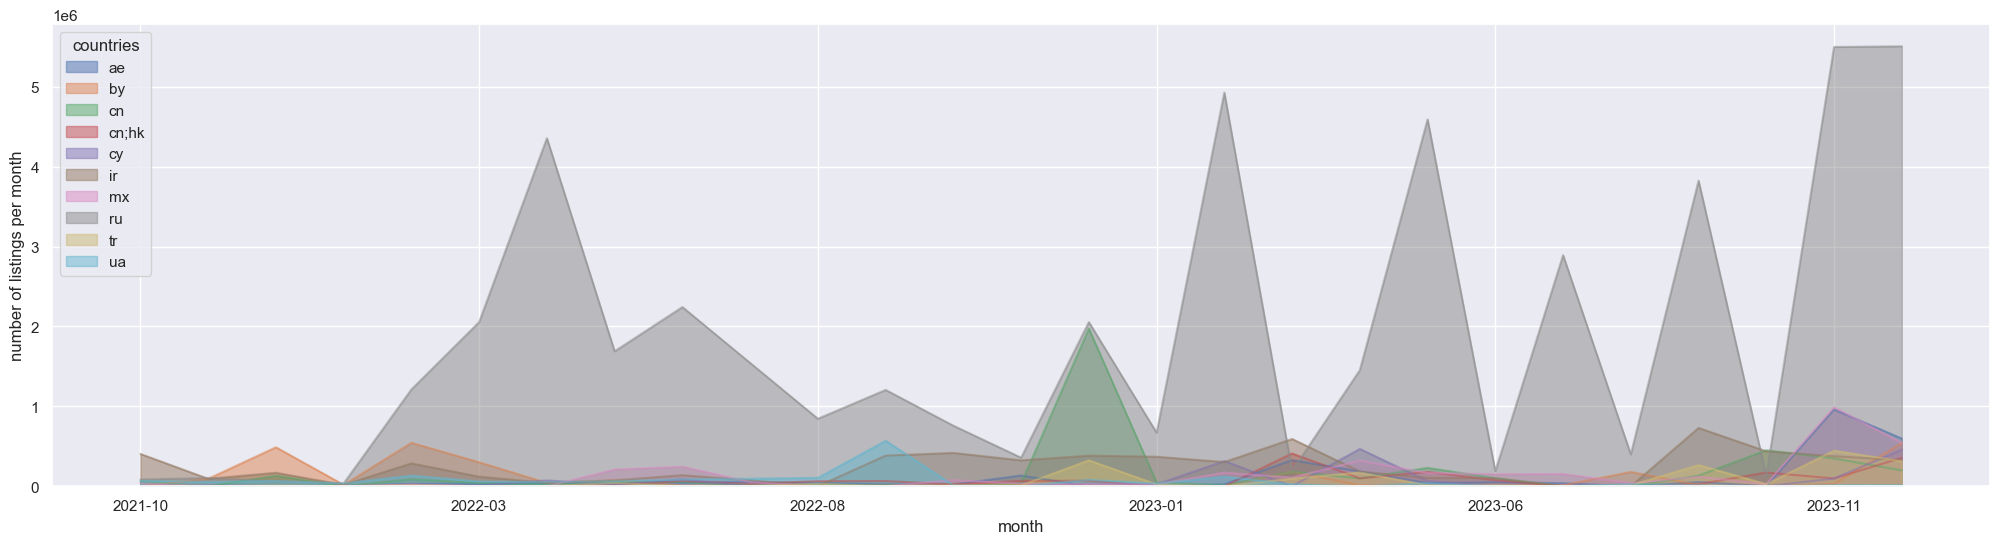

In [20]:
#time trend of the top iso codes
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
grouped2 = data.groupby(['countries', 'month']).agg({'listing_count': 'sum'})
top_countries2 = grouped2.groupby('countries').agg({'listing_count': 'sum'}).nlargest(10, 'listing_count').index.tolist()
filtered2 = grouped2[grouped2.index.get_level_values('countries').isin(top_countries2)]
pivoted2 = filtered2.reset_index().pivot(index='month', columns='countries', values='listing_count')
pivoted2.plot.area(stacked=False)

plt.xlabel('month')
plt.ylabel('number of listings per month')
plt.savefig('timetrend_listings_stacked.png')

# Show the plot
plt.show()

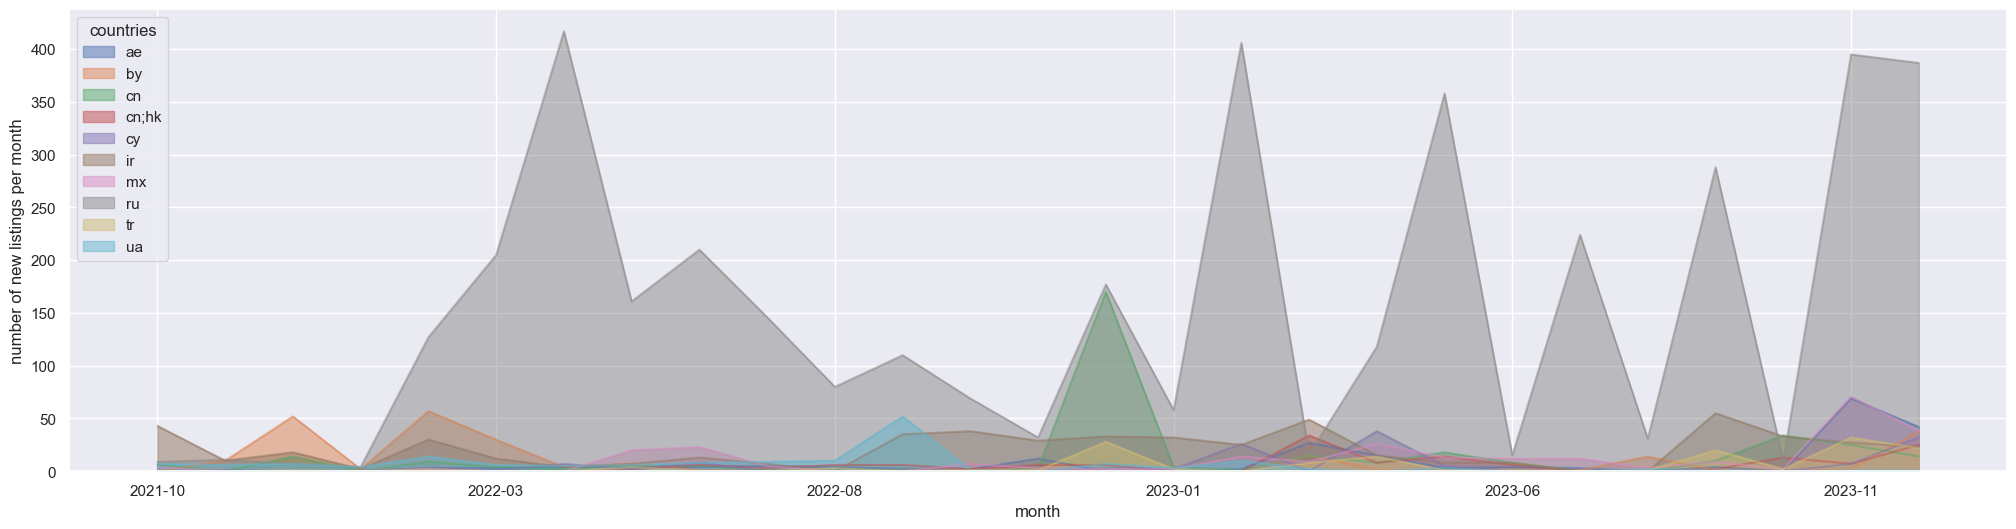

In [21]:
#time trend of the top iso codes
grouped2 = data.groupby(['countries', 'month']).agg({'new_listing_count': 'sum'})
top_countries2 = grouped2.groupby('countries').agg({'new_listing_count': 'sum'}).nlargest(10, 'new_listing_count').index.tolist()
filtered2 = grouped2[grouped2.index.get_level_values('countries').isin(top_countries2)]
pivoted2 = filtered2.reset_index().pivot(index='month', columns='countries', values='new_listing_count')
pivoted2.plot.area(stacked=False)

plt.xlabel('month')
plt.ylabel('number of new listings per month')
plt.savefig('timetrend_new_listings.png')

# Show the plot
plt.show()

In [22]:
#get the sates with the most new listings
data['listing_date'].value_counts().nlargest(10)

listing_date
20220324    419
20230519    324
20220930    301
20221001    287
20231212    277
20230224    253
20231102    229
20231106    226
20230226    226
20221209    217
Name: count, dtype: int64

In [23]:
#get the top shema
data['schema'].value_counts().nlargest(5)

schema
Person          5534
Organization    3655
Company         1531
Vessel           381
Airplane         102
Name: count, dtype: int64

In [24]:
#get the top sanctions regime
data['sanctions'].value_counts().nlargest(15)

sanctions
SDN List - Executive Order 14024 (Russia)                                1673
Block - SDN List - Program - Executive Order 14024                        849
Block - Program - SDN List - Executive Order 14024                        813
Program - SDN List - Block - Executive Order 14024                        710
SDN List - Executive Order 14024                                          686
SDN List - Program - Block - Executive Order 14024                        588
SDN List - Block - Program - Executive Order 14024                        538
SDN List - Executive Order 13224 (Terrorism)                              376
SDN List - Executive Order 14059 (Illicit Drugs)                          239
SDN List - Block - Program - Executive Order 13818 (Global Magnitsky)     193
SDN List - Executive Order 13818 (Global Magnitsky)                       153
SDN List - Executive Order 13382 (Non-proliferation)                      141
Program - Block - SDN List - Executive Order 14024    

**filter russia**

Block - Program - SDN List - Executive Order 14024                        2257
Block - SDN List - Program - Executive Order 14024                        1958
Program - SDN List - Block - Executive Order 14024                        1931
SDN List - Executive Order 14024 (Russia)                                 1506
SDN List - Executive Order 14024                                           883
SDN List - Program - Block - Executive Order 14024                         874
SDN List - Block - Program - Executive Order 14024
#über executive order gehen und mit "ru" vergleichen

In [25]:
data_russ=data[data['countries'].str.contains("ru")==True]

In [26]:
data_russ2=data[data['sanctions'].str.contains("14024")==True]

In [27]:
data_russ2.countries.unique()

array(['ua', 'ru;ua', 'ru', 'am', nan, 'az', 'kz', 'by', 'gb', 'cn;hk',
       'ao', 'ge', 'bg;ru', 'by;ru', 'cy', 'de', 'vn', 'ck', 'bm', 'ky',
       'fr;ru', 'cy;ru', 'vg', 'ch;fi', 'be;fr;ru', 'mt;ru', 'mt', 'sg',
       'gb;ru', 'es', 'hr', 'fr', 'fi;gb', 'nz', 'nl', 'md', 'ch', 'at',
       'lu', 'ae;md', 'ee;ru', 'am;ru', 'gb;za', 'tg', 'ua;ua-dpr',
       'az;cy;ru', 'ru;ua;ua-cri', 'ru;sy', 'uz', 'ge;ru', 'md;ru;ua',
       'je;mc;ru', 'tr', 'ie', 'ae', 'ir', 'ae;ru', 'il;md', 'ch;ee',
       'ch;fr', 'ch;ru', 'tw', 'ae;es;mt;sy', 'ae;ch;kn', 'lv;ru',
       'gb;je', 'il;ru', 'cn', 'bg;gb;ru', 'cz;ru', 'cy;il;ru', 'lv',
       'il', 'bg', 'il;uz', 'cy;il', 'il;it;ru', 'ru;sg', 'ee', 'cz',
       'ch;it', 'ch;it;mt', 'ch;es', 'ch;de', 'ae;mt', 'bs;cy',
       'cy;fr;ru', 'at;ch', 'cy;gb', 'bm;ch', 'hu;ru', 'cy;ky', 'li',
       'it;ru;sk', 'at;ch;li', 'de;lv;ru', 'cy;it;mc', 'ch;li',
       'ch;gb;li', 'hu', 'cy;uz', 'cy;fr;il;ru', 'cy;gb;ru', 'sk', 'im',
       'ae;uz', 'ae;cy

In [28]:
match= data_russ['countries'].equals(data_russ2['countries'])
print(match)

False


In [29]:
data_russ

,id,schema,name,aliases,birth_date,countries,addresses,identifiers,sanctions,phones,...,deletion,unchanged,month,listing_count,listing_date,delisting_date,new_listing_count,year_id,month_id,listing_month
11741,NK-i3nSNhvAUyNZwDAvFen9J6,Person,Nam Ung KIM,NaN,NaN,kp;ru,"Korea, North;Moscow",654110043,Block - SDN List - Program - Executive Order 1...,NaN,...,False,False,2021-10,9410,20211014,NaN,1,2021,27,309
10800,NK-eyfJKDoYFY8GUYL597eFZX,Person,Andrey Vladimirovich CHEREZOV,Andrei Cherezov;Andrey Cherezov,1967-10-12,ru,Russia,NaN,SDN List - Block - Program - Executive Order 1...,NaN,...,False,False,2021-10,9410,20211030,NaN,1,2021,27,309
11462,NK-h8HkG9AmVCnJtCFWfN78pN,Organization,BENEVOLENCE INTERNATIONAL FOUNDATION,AL BIR AL DAWALIA;BIF;BIF-USA;MEZHDUNARODNYJ B...,NaN,az;ba;bd;ca;cn;ge;hr;nl;pk;ru;sa;sd;tj;us,"(Formerly located at) 20-24 Branford Place, Su...",36-3823186,Program - Block - SDN List - Executive Order 1...,NaN,...,False,False,2021-10,9410,20211005,NaN,1,2021,27,309
2859,NK-CNtajKD75HPcro3jTED8En,Company,Russian National Commercial Bank,RNCB;RNKB OAO;Rossiski Natsionalny Kommerchesk...,NaN,ru,"d. 9 korp. 5 ul.Krasnoproletarskaya, Moscow, 1...",09610705;1027700381290;7701105460;RNCORUMM,SDN List - Block - Program - Executive Order 1...,NaN,...,False,False,2021-10,9410,20211030,NaN,1,2021,27,309
12709,NK-m2Sb2V4G2S6gVcxYXMKjTT,Organization,STROYGAZMONTAZH,LIMITED LIABILITY COMPANY STROYGAZMONTAZH;SGM;...,NaN,ru,"53 prospekt Vernadskogo, Moscow, 119415",NaN,Program - Block - SDN List - Executive Order 1...,NaN,...,False,False,2021-10,9410,20211005,NaN,1,2021,27,309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20070,ofac-45990,Organization,LIMITED LIABILITY COMPANY NEW DECISIONS 4,Общество С Ограниченной Ответственностью Новые...,NaN,ru,"14 Spartakovskaya Square, Building 3, Suite 9N...",1227700521510;9701216822,SDN List - Executive Order 14024 (Russia),NaN,...,False,False,2023-12,14229,20231212,NaN,1,2023,7,843
20073,ofac-45993,Organization,LIMITED LIABILITY COMPANY RADIO REKLAMA VOLOGDA,LIMITED LIABILITY COMPANY RRV;OOO Radio Reklam...,NaN,ru,"7 Lesnaya Street, Tverskoy Municipal District,...",1183525002968;3525419372,SDN List - Executive Order 14024 (Russia),NaN,...,False,False,2023-12,14229,20231212,NaN,1,2023,7,843
665,NK-4QBfbfaXttuzoydbmkAbFQ,Organization,SIGMA TEKH,NaN,NaN,ru,"Ul. Inzhenernaya D. 28, 630090 Novosibirsk",1085473011678;5408264672,SDN List - Executive Order 14024 (Russia),NaN,...,False,False,2023-12,14229,20231214,NaN,1,2023,7,843
20079,ofac-46000,Organization,LIMITED LIABILITY COMPANY FINANCE DECISIONS,Общество С Ограниченной Ответственностью Финан...,NaN,ru,"14 Spartakovskaya Square, Building 3, Suite 9N...",1217700369105;9729311995,SDN List - Executive Order 14024 (Russia),NaN,...,False,False,2023-12,14229,20231212,NaN,1,2023,7,843


[Text(0.5, 1.0, 'new RUSSIA listings per month, OFAC SDN list')]

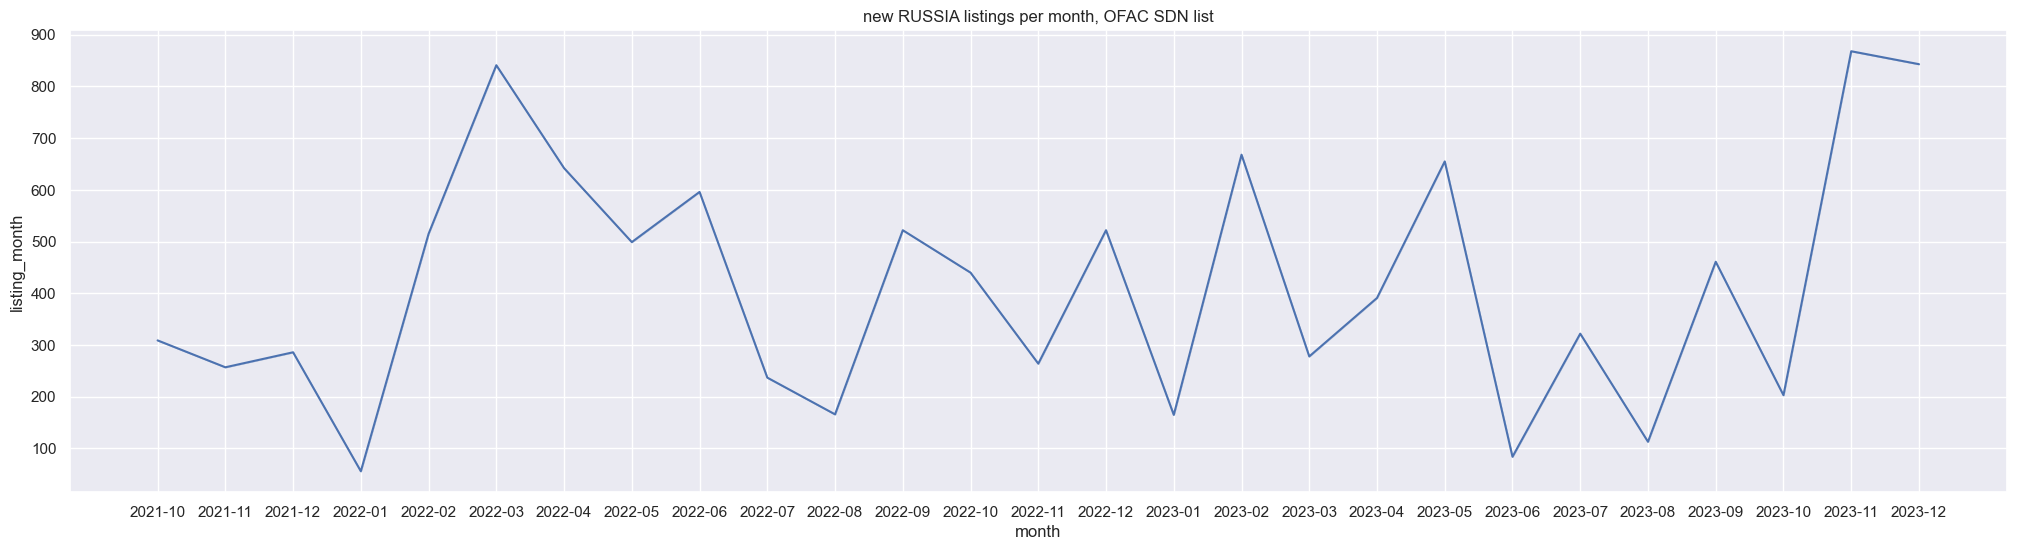

In [30]:
#make wider and remove outliers
data_russ = data_russ[data_russ['month'] > '2021-09']
sns.set(rc={"figure.figsize":(25, 6)}) #width=3, #height=4
plot_russ = sns.lineplot(data=data_russ,x='month',y='listing_month').set(title="new RUSSIA listings per month, OFAC SDN list")
plot_russ

[Text(0.5, 1.0, 'RUSSIA listings per month accumulated, OFAC SDN list')]

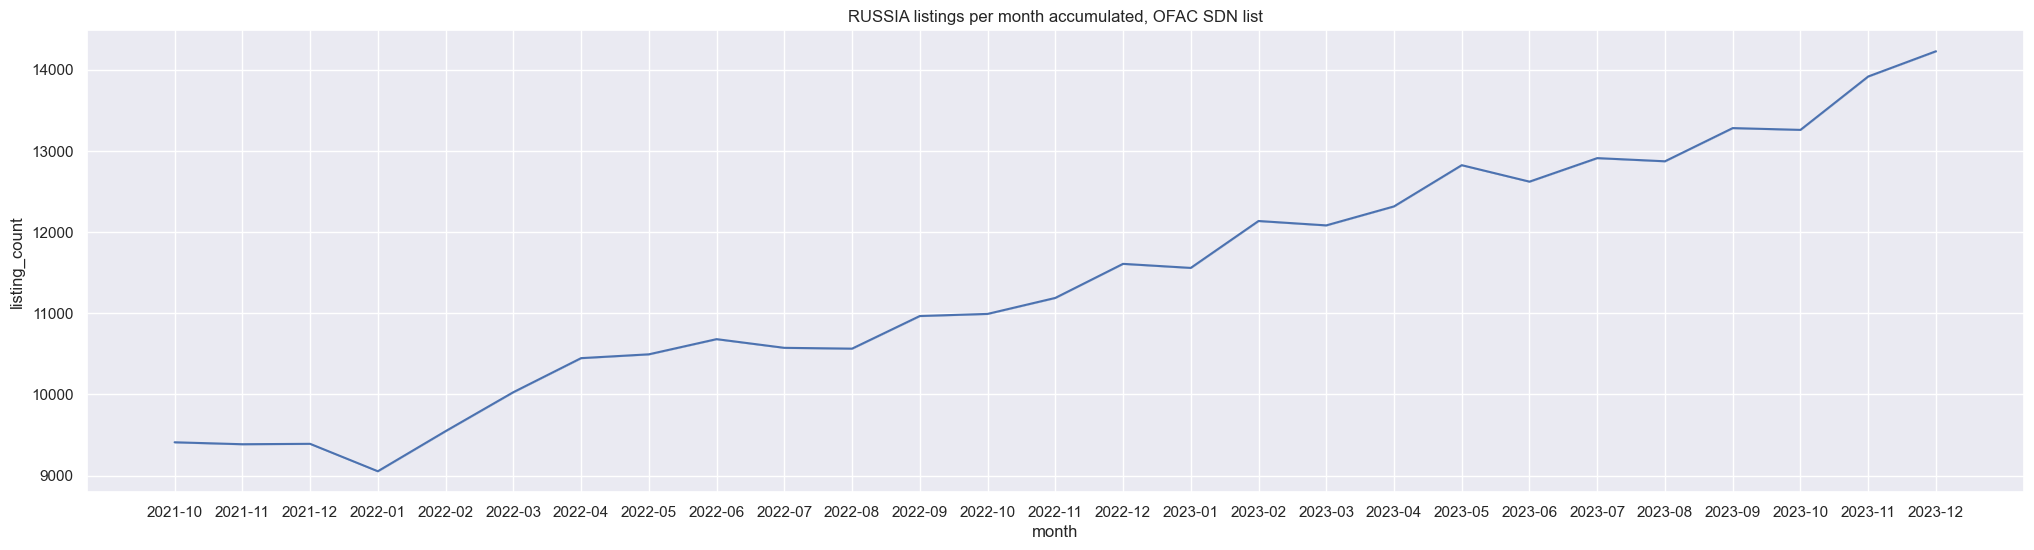

In [31]:
#make wider and remove outliers
data_russ = data_russ[data_russ['month'] > '2021-09']
sns.set(rc={"figure.figsize":(25, 6)}) #width=3, #height=4
plot_russ = sns.lineplot(data=data_russ,x='month',y='listing_count').set(title="RUSSIA listings per month accumulated, OFAC SDN list")
plot_russ

[Text(0.5, 1.0, 'new listings for exec order 14024 (Russia) per month, OFAC SDN list')]

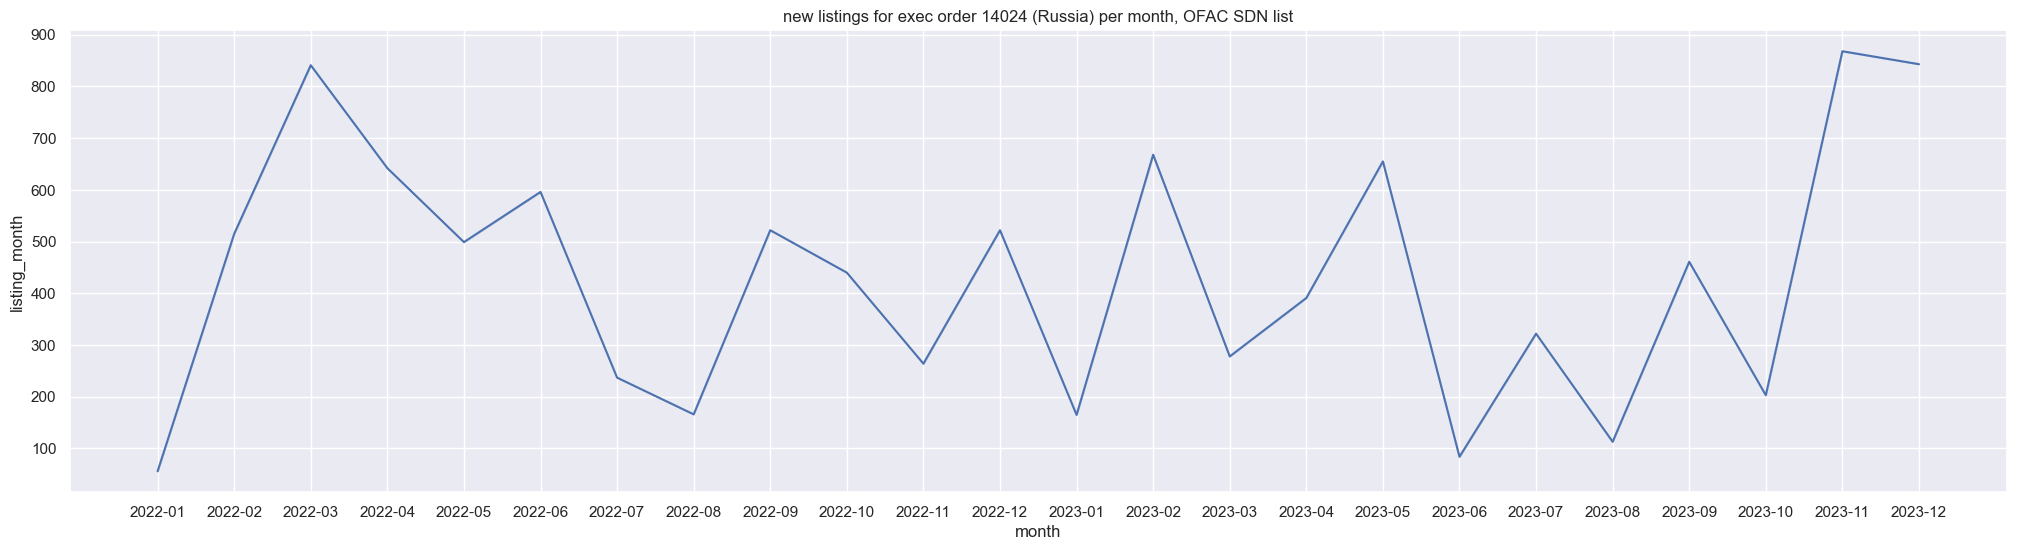

In [32]:
#make wider and remove outliers
data_russ2 = data_russ2[data_russ2['month'] > '2021-09']
sns.set(rc={"figure.figsize":(25, 6)}) #width=3, #height=4
plot_russ2 = sns.lineplot(data=data_russ2,x='month',y='listing_month').set(title="new listings for exec order 14024 (Russia) per month, OFAC SDN list")
plot_russ2

[Text(0.5, 1.0, 'listings for exec order 14024 (Russia) per month accumulated, OFAC SDN list')]

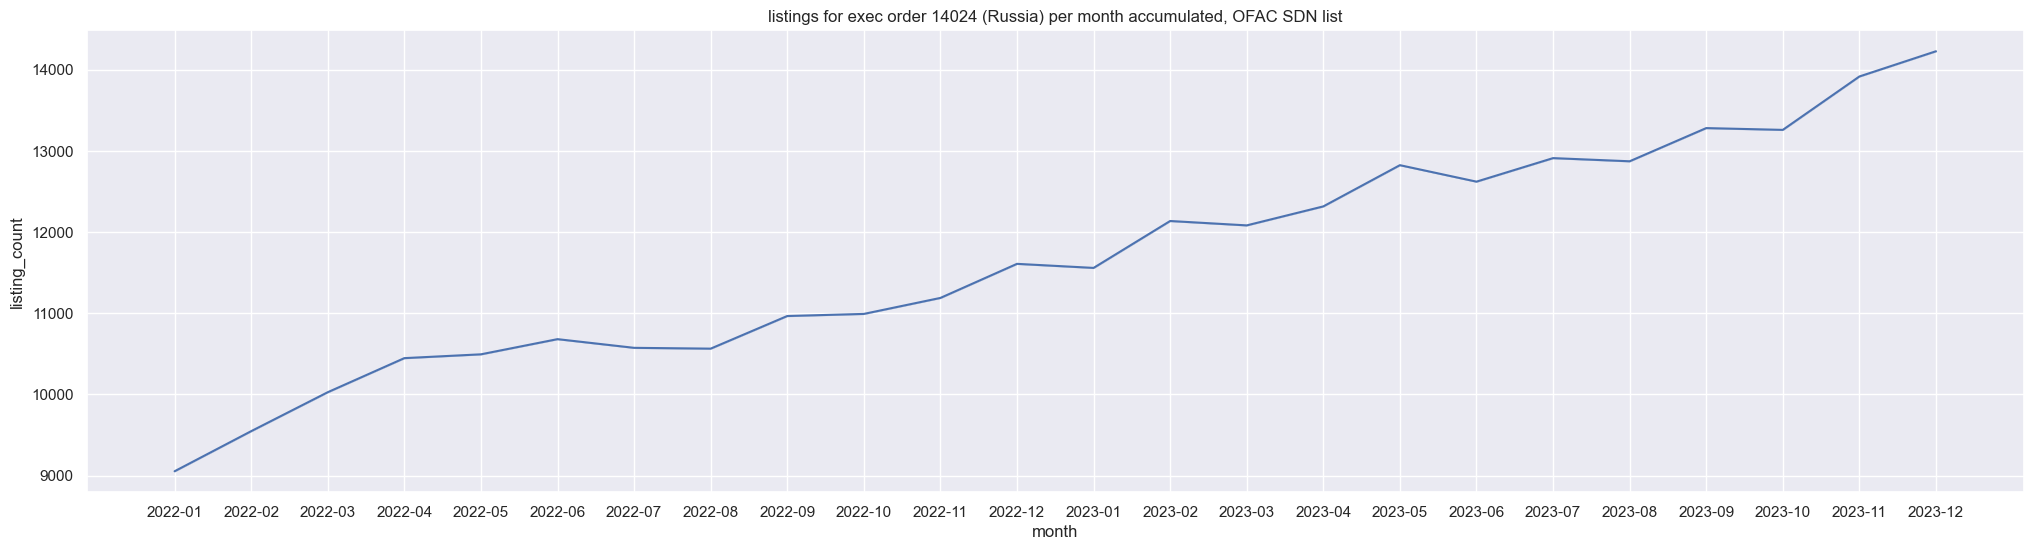

In [33]:
#make wider and remove outliers
data_russ2 = data_russ2[data_russ2['month'] > '2021-09']
sns.set(rc={"figure.figsize":(25, 6)}) #width=3, #height=4
plot_russ2 = sns.lineplot(data=data_russ2,x='month',y='listing_count').set(title="listings for exec order 14024 (Russia) per month accumulated, OFAC SDN list")
plot_russ2

# add trigger events

In [36]:
conflict.describe
# get a month id
conflict['month'] = pd.to_datetime(conflict['conflict_event']).dt.to_period('M')
conflict_os['month'] = pd.to_datetime(conflict_os['conflict_event']).dt.to_period('M')

In [37]:
print(conflict.columns)
conflict = conflict.sort_values(by=['month'])
print(conflict)
print(conflict_os.columns)
conflict_os = conflict_os.sort_values(by=['month'])
print(conflict_os)
print(protest.columns)
protest = protest.sort_values(by=['month'])
print(protest)

Index(['Unnamed: 0', 'id', 'relid', 'year', 'type_of_violence', 'country',
       'country_id', 'fatality_best_estimate', 'gwnoa', 'gwnob',
       'conflict_event', 'iso', 'month'],
      dtype='object')
      Unnamed: 0      id                 relid  year  type_of_violence  \
1507       85255  327584    DRC-2020-2-15650-0  2020               2.0   
1872       85722  325549    DRC-2020-3-16065-4  2020               3.0   
1873       85723  327127    DRC-2020-3-16065-5  2020               3.0   
1542       85310  325162    DRC-2020-2-15892-0  2020               2.0   
997        83689  377179   DRC-2020-1-10509-21  2020               1.0   
...          ...     ...                   ...   ...               ...   
957        83165  460439    DRC-2022-3-2434-27  2022               3.0   
956        83164  460230    DRC-2022-3-2434-26  2022               3.0   
894        81915  460094    AFG-2022-3-973-669  2022               3.0   
2798       86694  460325    DRC-2022-2-17417-5  2022    

In [49]:
import scipy
from scipy import stats
import statsmodels
# Step 1: Perform a t-test
t_statistic, p_value = stats.ttest_ind(conflict.dropna()['fatality_best_estimate'],data_russ.dropna()['listing_month'])
# Print the results of the t-test
print("T-Test Results:")
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Step 2: Perform ANOVA
f_statistic, p_value_anova = stats.f_oneway(conflict['fatality_best_estimate'],data_russ['listing_month'])

# Print the results of ANOVA
print("\nANOVA Results:")
print("F-statistic:", f_statistic)
print("P-value (ANOVA):", p_value_anova)

T-Test Results:
T-statistic: nan
P-value: nan

ANOVA Results:
F-statistic: nan
P-value (ANOVA): nan


,month,new_listing_count
0,2021-10,309
1,2021-11,257
2,2021-12,286
3,2022-01,56
4,2022-02,515
5,2022-03,841
6,2022-04,642
7,2022-05,499
8,2022-06,596
9,2022-07,237


,month,fatality_best_estimate
0,2020-01,526.0
1,2020-02,315.0
2,2020-03,320.0
3,2020-04,425.0
4,2020-05,352.0
5,2020-06,357.0
6,2020-07,385.0
7,2020-08,266.0
8,2020-09,289.0
9,2020-10,324.0


,month,fatality_best_estimate
0,2020-01,184.0
1,2020-02,231.0
2,2020-03,86.0
3,2020-04,194.0
4,2020-05,212.0
5,2020-06,206.0
6,2020-07,226.0
7,2020-08,164.0
8,2020-09,142.0
9,2020-10,186.0


,month,event_count
0,2020-01,299209
1,2020-02,181476
2,2020-03,110224
3,2020-04,79524
4,2020-05,293764
5,2020-06,529984
6,2020-07,375769
7,2020-08,438244
8,2020-09,547600
9,2020-10,552049


TypeError: float() argument must be a string or a real number, not 'Period'

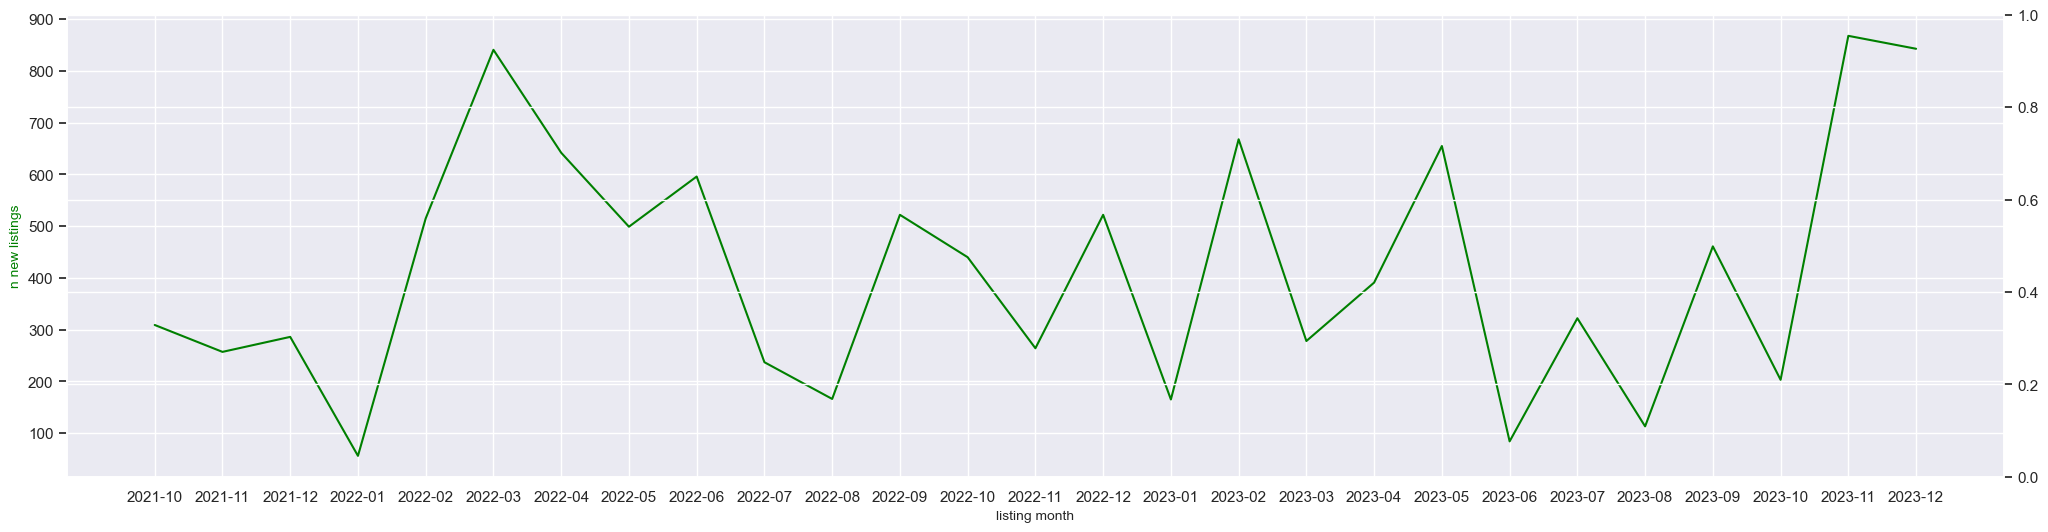

In [54]:
#get the new listings per month toether with conflict fatalities and protest events
# combined plot
grouped_1 = data.groupby(['month']).agg({'new_listing_count': 'sum'})
grouped_2 = conflict.groupby(['month']).agg({'fatality_best_estimate': 'sum'})
grouped_3 = conflict_os.groupby(['month']).agg({'fatality_best_estimate': 'sum'})
grouped_4 = protest.groupby(['month']).agg({'event_count': 'sum'})
grouped_1 = grouped_1.reset_index()
grouped_2 = grouped_2.reset_index()
grouped_3 = grouped_3.reset_index()
grouped_4 = grouped_4.reset_index()
display(grouped_1)
display(grouped_2)
display(grouped_3)
display(grouped_4)
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(grouped_1.month,
        grouped_1.new_listing_count,
        color="green")
# set x-axis label
ax.set_xlabel("listing month", fontsize = 10)
# set y-axis label
ax.set_ylabel("n new listings",
              color="green",
              fontsize=10)


# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(grouped_2.month, grouped_2["fatality_best_estimate"],color="blue")
ax2.set_ylabel("conflict fatalities",color="blue",fontsize=10)
plt.savefig('timetrend_combined_listing_month.png')


In [51]:

# twin object for two different y-axis on the sample plot
ax3=ax.twinx()
# make a plot with different y-axis using second axis object
ax3.plot(grouped_3.conflict_event, grouped_3["fatality_best_estimate"],color="red")
ax3.set_ylabel("conflict fatalities one sided violence",color="red",fontsize=10)
plt.savefig('timetrend_conflict_os.png')

<Figure size 2500x600 with 0 Axes>

In [52]:
# twin object for two different y-axis on the sample plot
ax4=ax.twinx()
# make a plot with different y-axis using second axis object
ax4.plot(grouped_4.protest_event_date, grouped_4["event_count"],color="orange")
ax4.set_ylabel("n protest events",color="orange",fontsize=10)
plt.savefig('timetrend_protest.png')

<Figure size 2500x600 with 0 Axes>

# US CONS List #

In [ ]:
data = cons.copy()
#get column names
print(data.columns)
print(data.describe())
print(data.schema.unique())
print(data.month.unique())
print(data.month.nunique())

print(data.date_stamp.unique())
print(data.date_stamp.nunique())
# receive information on missing values/ null values
is_null = data.isnull().sum()
print(is_null)

In [ ]:
#get the listings per month
listings_us_cons = sns.lineplot(data=cons,x='month_id',y='new_listing_count')
listings_us_cons

**BIS denied Persons lists**

In [ ]:
data = bis.copy()
#get column names
print(data.columns)
print(data.describe())
print(data.schema.unique())
print(data.month.unique())
print(data.month.nunique())

print(data.date_stamp.unique())
print(data.date_stamp.nunique())
# receive information on missing values/ null values
is_null = data.isnull().sum()
print(is_null)

In [ ]:
#get the listings per month
bis = bis.groupby(['month','listing_count']).sum().reset_index()
listings_us_bis = sns.lineplot(data=bis,x='month',y='new_listing_count')
listings_us_bis

In [ ]:
# filter for russia

In [ ]:
us.iso.unique()

In [ ]:
df_russia = us[us['iso']=='RUS']
df_russia